# Page International Financial Services, Assessment

### Ques 1:
#### Write a program that reads the Excel files: AAPL, MSFT, TSLA, FB, and AMZN. Plot these stocks on the same graph, ranging from 5-11-2012 to 4-11-2020. Write a code that prints the following on the same graph:
#### • Stock Prices of Five Companies as the title
#### • Date as the x-axis using the datetime built-in function in MATLAB.
#### • Adjusted Close as the y-axis
#### • AAPL, MSFT, TSLA, FB, and AMZN as the Legend of each price, respectively

In [1]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load dataset
#check for one of the files
df_aapl = pd.read_csv('DATA FILES/AAPL.csv', parse_dates=['Date'], index_col='Date')
df_amzn = pd.read_csv('DATA FILES/AMZN.csv', parse_dates=['Date'], index_col='Date')
df_fb = pd.read_csv('DATA FILES/FB.csv', parse_dates=['Date'], index_col='Date')
df_msft = pd.read_csv('DATA FILES/MSFT.csv', parse_dates=['Date'], index_col='Date')
df_nflx = pd.read_csv('DATA FILES/NFLX.csv', parse_dates=['Date'], index_col='Date')
df_nvda = pd.read_csv('DATA FILES/NVDA.csv', parse_dates=['Date'], index_col='Date')
df_tsla = pd.read_csv('DATA FILES/TSLA.csv', parse_dates=['Date'], index_col='Date')
df_amzn.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-29,3201.270020,3257.250000,3164.000000,3211.010010,3211.010010,6596500
2020-10-30,3157.750000,3167.000000,3019.000000,3036.149902,3036.149902,8386400
2020-11-02,3061.739990,3079.709961,2950.120117,3004.479980,3004.479980,7257400
2020-11-03,3018.530029,3074.899902,2980.979980,3048.409912,3048.409912,4897900
2020-11-04,3159.989990,3244.850098,3139.729980,3241.159912,3241.159912,6820000


In [3]:
df_fb.index

DatetimeIndex(['2012-11-05', '2012-11-06', '2012-11-07', '2012-11-08',
               '2012-11-09', '2012-11-12', '2012-11-13', '2012-11-14',
               '2012-11-15', '2012-11-16',
               ...
               '2020-10-22', '2020-10-23', '2020-10-26', '2020-10-27',
               '2020-10-28', '2020-10-29', '2020-10-30', '2020-11-02',
               '2020-11-03', '2020-11-04'],
              dtype='datetime64[ns]', name='Date', length=2015, freq=None)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


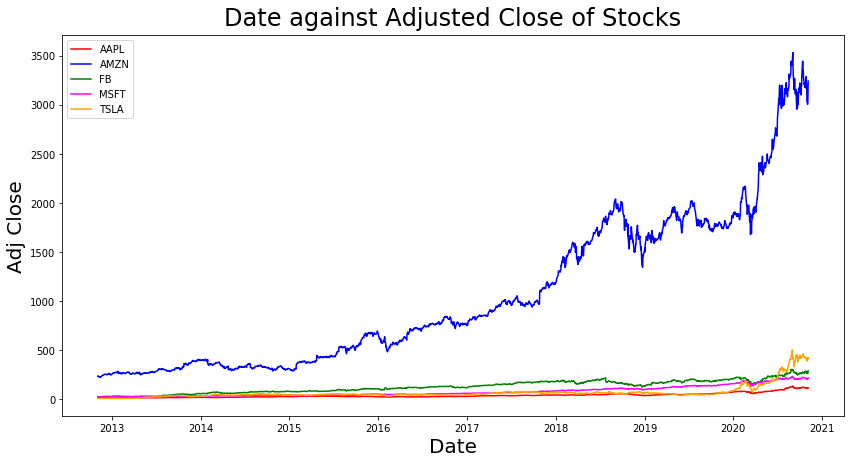

In [4]:
plt.figure(figsize=(14,7))
#plt.style.use('ggplot')

plt.plot(df_aapl.index,df_aapl['Adj Close'], label='AAPL', color='red')
plt.plot(df_amzn.index,df_amzn['Adj Close'], label='AMZN', color='blue')
plt.plot(df_fb.index,df_fb['Adj Close'], label='FB', color='green')
plt.plot(df_msft.index,df_msft['Adj Close'], label='MSFT', color='magenta')
plt.plot(df_tsla.index,df_tsla['Adj Close'], label='TSLA', color='orange')

plt.xlabel('Date', fontsize=20)
plt.ylabel('Adj Close', fontsize=20)

plt.title('Date against Adjusted Close of Stocks', fontsize=24, y=1.01)

plt.legend()

### Ques 2

#### Solve Example 2.1 of Algorithmic Trading - Trading Software (PDFDrive). You can download the Book from https://www.pdfdrive.com/algorithmic-trading-trading-software-d16947214.html. To solve the problem, you need to read Page 199 of the Book and the details given in that Example.

USD_CAD historical data was downloaded from https://www.investing.com/currencies/usd-cad-historical-data of the same year with the one given in the example.

In [5]:
#load the data
# change the date to datetime
#make the date the index of the dataframe

df_usd_cad = pd.read_csv('USD_CAD Historical Data (1).csv',parse_dates=['Date'], index_col='Date')
df_usd_cad.head()

,Price,Open,High,Low,Change %
Date,,,,,
2012-03-28,0.9983,0.9956,1.0003,0.9945,0.30%
2012-03-27,0.9953,0.9912,0.9958,0.9898,0.46%
2012-03-26,0.9907,0.9982,1.0001,0.9903,-0.74%
2012-03-23,0.9981,0.9990,1.0034,0.9970,-0.10%
2012-03-22,0.9991,0.9925,1.0011,0.9912,0.71%


Let us visualize the data

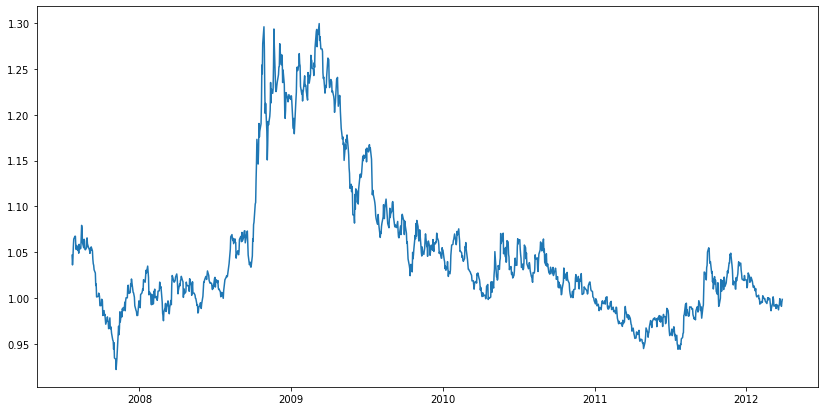

In [6]:
plt.figure(figsize=(14,7))
plt.plot(df_usd_cad.index, df_usd_cad.Price)

It is observe from the graph that the price does not look very stationary

Lets test using the adf test method

In [10]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
#autolag='AIC'
#maxlag=1

#parameter option 'AIC' is chosen to allow adf to choose a the number of lags that yields the lowest AIC
result = adfuller(df_usd_cad['Price'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -1.7371459003188354
n_lags: 0.4120825091771833
p-value: 0.4120825091771833
Critial Values:
   1%, -3.4357748759345768
Critial Values:
   5%, -2.8639355566269677
Critial Values:
   10%, -2.5680454348767596


The p-value is greater that the significance level 0.05, and the ADF Statistic is higher than any of the critical values. 

The null hypothesis, therefore cannot be rejected. It follows that the time series is not stationary

So the USD.CAD can not be shown to be stationary

### Ques 3
#### Write a function called page financials that takes a matrix as an input argument and returns four outputs: the elements at its four corners in this order: top left, top right, bottom left and bottom right.

In [18]:

def page_financials(a, b, c, d):
    
    #generate random number matrix
    #where a and b signify the number range i.e numbers between a and b
    #c and d signify the order of the matrix
    matrix_input = np.random.randint(a,b,(c,d))
    print('The matrix is', matrix_input)
    
    #check whether it is a matrix. numpy array are used as matrix in python
    if type(matrix_input) != np.ndarray:
        return 'Must be a numpy array'
    else :
        top_left = matrix_input[c-1][d-1]
        top_right = matrix_input[c-1][0]
        bottom_left = matrix_input[0][d-1]
        bottom_right = matrix_input[0][0]
        
    print('The top left number is ', top_left)
    print('The top right number is ', top_right)
    print('The bottom left number is ', bottom_left)
    print('The bottom right number is ', bottom_right)
    
    
page_financials(3,10,2,2)

The matrix is [[4 3]
 [4 9]]
The top left number is  9
The top right number is  4
The bottom left number is  3
The bottom right number is  4
